In [ ]:
# No wandb
import trainer as tb
import misc

log = []
modelname = "baseline"
data_path = "../data/dataset_mini/"
result_model_file = "results/dummy/dummy.pth"
result_model_file_final = "results/dummy/dummy_final.pth"
result_logs_file = "results/dummy/dummy_results.json"
res = tb.train_eval_model(model_name=modelname,
                          data_dir=data_path,
                          batch_size=2,
                          epochs=2,
                          momentum=0.9,
                          lr=0.01,
                          weight_decay=2e-05,
                          useCosineAnnealingLR=True,
                          warmup_epochs=0,
                          warmup_lr_decay=0.01,
                          label_smoothing=0.1,
                          class_weights=(0.5, 1),
                          n_data_workers=4,
                          pin_memory=True,
                          cuda_force=False,
                          log=log,
                          wandb_id=None,
                          wandb_project="",
                          safe_model=True,
                          safe_model_file=result_model_file,
                          safe_model_file_final=result_model_file_final)
misc.save_to_json_robust(res, result_logs_file)

In [ ]:
# No wandb
import trainer as tb
import misc

log = []
modelname = "resnet50_2fc"
data_path = "../data/dataset_mini/"
result_model_file = "results/dummy/dummy.pth"
result_logs_file = "results/dummy/dummy_results.json"
res = tb.train_eval_model(model_name=modelname,
                          data_dir=data_path,
                          batch_size=2,
                          epochs=4,
                          momentum=0.9,
                          lr=0.01,
                          weight_decay=2e-05,
                          useCosineAnnealingLR=True,
                          warmup_epochs=2,
                          warmup_lr_decay=0.01,
                          label_smoothing=0.1,
                          n_data_workers=4,
                          pin_memory=True,
                          cuda_force=False,
                          log=log,
                          wandb_id=None,
                          wandb_project="",
                          safe_model=True,
                          safe_model_file=result_model_file)
misc.save_to_json_robust(res, result_logs_file)

In [ ]:
# With wandb
import trainer as tb
import misc
import wandb
wandb.login()

# Start a new wandb run to track this script
run = wandb.init(
    # set the wandb project where this run will be logged
    project="my-awesome-project",
    name="test_on_mini_from_local",
)

log = []
modelname = "baseline"
data_path = "../data/dataset_mini/"
result_model_file = "results/dummy/dummy.pth"
result_logs_file = "results/dummy/dummy_results.json"
res = tb.train_eval_model(model_name=modelname,
                          data_dir=data_path,
                          batch_size=2,
                          epochs=4,
                          momentum=0.9,
                          lr=0.01,
                          weight_decay=2e-05,
                          useCosineAnnealingLR=True,
                          warmup_epochs=2,
                          warmup_lr_decay=0.01,
                          label_smoothing=0.1,
                          n_data_workers=4,
                          pin_memory=True,
                          cuda_force=False,
                          log=log,
                          wandb_id=run.id,
                          wandb_project="my-awesome-project",
                          safe_model=True,
                          safe_model_file=result_model_file)
misc.save_to_json_robust(res, result_logs_file)

In [1]:
# Testing the evaluate model function
import trainer

model_file_path = "results/colab/bl_enhanced_4_us_final.pth"
test_set_path = "../data/dataset_mini/test"

r = trainer.evaluate_model(model_file_path=model_file_path,
                           test_set_path=test_set_path,
                           batch_size=8,
                           num_workers=4,
                           make_detailed_predictions=True)
r


CUDA is not available.


Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

{'labels': [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
 'predictions': [0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0],
 'classes': ['non_smile', 'smile'],
 'detailed_predictions': [{'file': '00a454da495e11e28a7322000a1fa414_6.jpg',
   'true_label': 'non_smile',
   'predicted_label': 'non_smile',
   'probabilities': [0.6267724, 0.37322757]},
  {'file': '02ee8060b02f11e38fe012b1c8928cc9_6.jpg',
   'true_label': 'non_smile',
   'predicted_label': 'non_smile',
   'probabilities': [0.5560851, 0.44391486]},
  {'file': '044c14a2bff911e396ce0002c9de8044_6.jpg',
   'true_label': 'non_smile',
   'predicted_label': 'smile',
   'probabilities': [0.38814086, 0.6118591]},
  {'file': '0598ce50b1f711e3bd391271df4caaa4_6.jpg',
   'true_label': 'non_smile',
   'predicted_label': 'smile',
   'probabilities': [0.38239607, 0.61760396]},
  {'file': '061897ee69b811e2896422000a1fb003_6.jpg',
   'true_label': 'non_smile',
   'predicted_label': 'non_smile',
   'probabilities': [0.6611462, 0.33885378]},


Accuracy: 0.6250
Precision: 0.6250
Recall: 0.6250
F1 Score: 0.6250


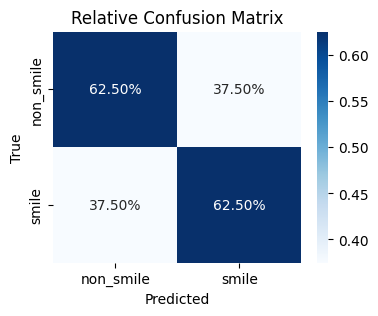

In [9]:
from sklearn.metrics import (accuracy_score, precision_recall_fscore_support,
                             confusion_matrix)
import matplotlib.pyplot as plt
import seaborn as sns

all_labels = r['labels']
all_preds = r['predictions']
classes = r['classes']

# Calculate overall metrics
accuracy = accuracy_score(all_labels, all_preds)
precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_preds, average='binary')
conf_matrix = confusion_matrix(all_labels, all_preds)

# Print overall metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Plot relative confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix / conf_matrix.sum(axis=1)[:, None], annot=True, fmt=".2%",
            cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.title("Relative Confusion Matrix")
plt.ylabel("True")
plt.xlabel("Predicted")
plt.show()

In [12]:
import glob

models_and_log_path = "results/colab"

final_models = glob.glob(models_and_log_path + "/*_final.pth")
final_models

['results/colab\\bl_3_us_final.pth',
 'results/colab\\bl_cw_final.pth',
 'results/colab\\bl_enhanced_1_us_final.pth',
 'results/colab\\bl_enhanced_2_bs64_us_final.pth',
 'results/colab\\bl_enhanced_2_cw2_final.pth',
 'results/colab\\bl_enhanced_2_cw_final.pth',
 'results/colab\\bl_enhanced_2_final.pth',
 'results/colab\\bl_enhanced_2_us_final.pth',
 'results/colab\\bl_enhanced_3_bs256_us_final.pth',
 'results/colab\\bl_enhanced_3_us_final.pth',
 'results/colab\\bl_enhanced_4_us_final.pth',
 'results/colab\\bl_us_final.pth',
 'results/colab\\resnet50_2fc_3_us_final.pth',
 'results/colab\\rn50_uf34_1_us_final.pth',
 'results/colab\\rn50_uf34_2_us_final.pth',
 'results/colab\\rn50_uf34_3_us_final.pth',
 'results/colab\\rn50_uf34_4_us_final.pth',
 'results/colab\\rn50_uf4_1_us_final.pth',
 'results/colab\\rn50_uf4_2_us_final.pth',
 'results/colab\\rn50_uf4_3_us_final.pth',
 'results/colab\\rn50_uf4_4_us_final.pth']

In [13]:
import os
one_model = final_models[0]

# extract name
run_name = os.path.basename(one_model).split("_final.pth")[0]
log_name = run_name + "_log.json"


'bl_3_us'

In [ ]:
# Display 8 pictures from the detailed predictions, the first 4 and the last 4 in a 2x4 grid
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(2, 4, figsize=(16, 8))


In [22]:
# details = r["detailed_predictions"]

image_directory = test_set_path
details_list = r["detailed_predictions"][:4] + r["detailed_predictions"][-4:]

fig, axs = plt.subplots(2, 4, figsize=(15, 8))
axs = axs.ravel()

for detail in details_list:

    if detail["true_label"] == "non_smile":
        image_path = os.path.join(image_directory, "non_smile", detail["file"])
    else:
        image_path = os.path.join(image_directory, "smile", detail["file"])
    
    print(image_path)

    # img_path = os.path.join(image_directory, prediction['file'])
    # img = Image.open(img_path)
    # axs[i].imshow(img)
    # axs[i].set_title(f"True: {prediction['true_label']}\nPred: {prediction['predicted_label']}\nProb: {prediction['probabilities']}")
    # axs[i].axis('off')



# plt.tight_layout()
# plt.show()

[{'file': '00a454da495e11e28a7322000a1fa414_6.jpg',
  'true_label': 'non_smile',
  'predicted_label': 'non_smile',
  'probabilities': [0.6267724, 0.37322757]},
 {'file': '02ee8060b02f11e38fe012b1c8928cc9_6.jpg',
  'true_label': 'non_smile',
  'predicted_label': 'non_smile',
  'probabilities': [0.5560851, 0.44391486]},
 {'file': '044c14a2bff911e396ce0002c9de8044_6.jpg',
  'true_label': 'non_smile',
  'predicted_label': 'smile',
  'probabilities': [0.38814086, 0.6118591]},
 {'file': '0598ce50b1f711e3bd391271df4caaa4_6.jpg',
  'true_label': 'non_smile',
  'predicted_label': 'smile',
  'probabilities': [0.38239607, 0.61760396]},
 {'file': '061897ee69b811e2896422000a1fb003_6.jpg',
  'true_label': 'smile',
  'predicted_label': 'smile',
  'probabilities': [0.30319336, 0.69680667]},
 {'file': '06c71a9ead0011e3879b129cfeadffe8_6.jpg',
  'true_label': 'smile',
  'predicted_label': 'smile',
  'probabilities': [0.29371113, 0.7062888]},
 {'file': '09c515c4ad0611e3ae221212d5b5af4c_6.jpg',
  'true_la